In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

TO DO:
* calculate mean for the indicators
* compare mean with chosen company
* compare indicators for chosen companies
* automate finding companies with the best fundamentals

# Prepare data

In [2]:
directory = "Data/Daily_data"
stock_data = pd.DataFrame(columns=['Data', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen'])
stock_list = ['ACP', 'ALE', 'ALR', 'CCC', 'CDR', 'CPS', 'DNP', 'JSW', 'KGHM', 'LPP', 'LTS', 'MRC', 'OPL', 'PEO', 'PGE', 'PGN', 'PKN', 'PKO', 'PZU', 'SPL', 'TPE']
i = 0

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    single_stock_data = pd.read_csv(file_path)
#     single_stock_data = single_stock_data.rename(columns={'Data': 'Date', 'Otwarcie': 'Open', 'Najwyzszy': 'Highest', 'Najnizszy': 'Lowest', 'Zamkniecie': 'Close', 'Wolumen': 'Volume'})
    single_stock_data['Data'] = pd.to_datetime(single_stock_data.Data)
    single_stock_data['Spółka'] = stock_list[i]
    stock_data = stock_data.append(single_stock_data, ignore_index=True)
    i += 1
    print('Loaded file: ' + filename)

Loaded file: acp_d.csv
Loaded file: ale_d.csv
Loaded file: alr_d.csv
Loaded file: ccc_d.csv
Loaded file: cdr_d.csv
Loaded file: cps_d.csv
Loaded file: dnp_d.csv
Loaded file: jsw_d.csv
Loaded file: kgh_d.csv
Loaded file: lpp_d.csv
Loaded file: lts_d.csv
Loaded file: mrc_d.csv
Loaded file: opl_d.csv
Loaded file: peo_d.csv
Loaded file: pge_d.csv
Loaded file: pgn_d.csv
Loaded file: pkn_d.csv
Loaded file: pko_d.csv
Loaded file: pzu_d.csv
Loaded file: san_d.csv
Loaded file: tpe_d.csv


In [3]:
stock_data.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Spółka
0,1998-06-02,10.602,10.602,10.602,10.602,577707,ACP
1,1998-06-03,11.648,11.648,11.648,11.648,221464,ACP
2,1998-06-04,12.694,12.694,12.694,12.694,655891,ACP
3,1998-06-05,12.847,12.847,12.847,12.847,252087,ACP
4,1998-06-08,12.794,12.794,12.794,12.794,141804,ACP


In [4]:
fundamental_data = pd.read_csv('Data/WiG20_fundamental_indicators.csv')
fundamental_data.head()

,Spółka,Kwartały,Wartość księgowa,Cena/WK,Zysk na akcję,Cena/Zysk,Przychód,Cena/Przychód,Zysk operacyjny,Cena/Zysk operacyjny,...,Rotacja należności,Cykl należności,Cykl zobowiązań,Rotacja zapasów,Cykl zapasów,Rotacja majątku obrotowego,Rotacja majątku trwałego,Rotacja majątku ogółem,Cykl operacyjny,Cykl konwersji gotówki
0,ACP,2004/Q4,6.55,4.26,0.02,1 313.53,23.01,1.21,1.03,27.17,...,2.89,126,229,19.74,18.0,1.66,2.00,0.91,144,-85
1,ACP,2005/Q4,11.27,3.46,1.75,22.32,21.18,1.84,2.06,18.94,...,3.46,105,145,20.74,18.0,1.96,2.10,1.01,123,-22
2,ACP,2006/Q1,11.50,3.30,1.86,20.40,21.42,1.77,2.27,16.70,...,3.41,107,139,19.01,19.0,1.94,1.93,0.97,126,-13
3,ACP,2006/Q2,11.24,3.21,1.60,22.52,22.77,1.59,1.77,20.41,...,3.51,104,134,20.23,18.0,1.92,1.94,0.96,122,-12
4,ACP,2006/Q3,12.43,3.22,2.27,17.60,24.26,1.65,1.64,24.33,...,3.67,100,130,23.43,16.0,1.95,2.01,0.99,116,-14


In [5]:
fundamental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Spółka                                         1100 non-null   object 
 1   Kwartały                                       1100 non-null   object 
 2   Wartość księgowa                               1100 non-null   object 
 3   Cena/WK                                        1068 non-null   float64
 4   Zysk na akcję                                  1100 non-null   float64
 5   Cena/Zysk                                      956 non-null    object 
 6   Przychód                                       1100 non-null   object 
 7   Cena/Przychód                                  1070 non-null   float64
 8   Zysk operacyjny                                1100 non-null   float64
 9   Cena/Zysk operacyjny                           979 n

In [6]:
for column in fundamental_data.columns:
    if column in ['Spółka', 'Kwartały'] or fundamental_data[column].dtype == np.float64:
        pass
    else:
#         print(column)
        fundamental_data[column] = fundamental_data[column].astype(str).str.replace(" ","")
        fundamental_data[column] = pd.to_numeric(fundamental_data[column], errors='coerce')

In [7]:
fundamental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Spółka                                         1100 non-null   object 
 1   Kwartały                                       1100 non-null   object 
 2   Wartość księgowa                               1100 non-null   float64
 3   Cena/WK                                        1068 non-null   float64
 4   Zysk na akcję                                  1100 non-null   float64
 5   Cena/Zysk                                      956 non-null    float64
 6   Przychód                                       1100 non-null   float64
 7   Cena/Przychód                                  1070 non-null   float64
 8   Zysk operacyjny                                1100 non-null   float64
 9   Cena/Zysk operacyjny                           979 n

In [8]:
# changing quarters to approximited dates of publish
fundamental_data['Data'] = pd.to_datetime({'year': fundamental_data['Kwartały'].str[:4],
                                         'month': fundamental_data['Kwartały'].str[-1].map({'1':5, '2':8, '3':11, '4':2}),
                                         'day': 1}, format='%d/%m/%Y')

# limit the Dates only to the ones starting a year so the graphs keep a clean look
fundamental_data['Data_wykres'] = [int(x[:4]) + 1 if x[-1] == '4' else '' for x in fundamental_data['Kwartały']]


# yearly reports are published in the following year, so we need to update the dates
fundamental_data.loc[fundamental_data['Kwartały'].str[-1] == '4', 'Data'] = fundamental_data['Data'] + pd.offsets.DateOffset(years=1)

In [9]:
fundamental_data.head()

,Spółka,Kwartały,Wartość księgowa,Cena/WK,Zysk na akcję,Cena/Zysk,Przychód,Cena/Przychód,Zysk operacyjny,Cena/Zysk operacyjny,...,Cykl zobowiązań,Rotacja zapasów,Cykl zapasów,Rotacja majątku obrotowego,Rotacja majątku trwałego,Rotacja majątku ogółem,Cykl operacyjny,Cykl konwersji gotówki,Data,Data_wykres
0,ACP,2004/Q4,6.55,4.26,0.02,1313.53,23.01,1.21,1.03,27.17,...,229,19.74,18.0,1.66,2.00,0.91,144.0,-85.0,2005-02-01,2005
1,ACP,2005/Q4,11.27,3.46,1.75,22.32,21.18,1.84,2.06,18.94,...,145,20.74,18.0,1.96,2.10,1.01,123.0,-22.0,2006-02-01,2006
2,ACP,2006/Q1,11.50,3.30,1.86,20.40,21.42,1.77,2.27,16.70,...,139,19.01,19.0,1.94,1.93,0.97,126.0,-13.0,2006-05-01,
3,ACP,2006/Q2,11.24,3.21,1.60,22.52,22.77,1.59,1.77,20.41,...,134,20.23,18.0,1.92,1.94,0.96,122.0,-12.0,2006-08-01,
4,ACP,2006/Q3,12.43,3.22,2.27,17.60,24.26,1.65,1.64,24.33,...,130,23.43,16.0,1.95,2.01,0.99,116.0,-14.0,2006-11-01,


# Visualise fundamental indicators for single company

In [10]:
def plot_fundamental_indicators(stock_idx, indicator):
    start_year = int(fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, 'Kwartały'].iloc[0][:4])
    stock_price = stock_data.loc[(stock_data['Spółka'] == stock_idx) & (stock_data['Data'] > pd.Timestamp(start_year, 1, 1)), ['Data', 'Zamkniecie']]
    
    fig, ax1 = plt.subplots(figsize=(20,8))
    ax1.bar(fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, 'Data'], fundamental_data.loc[fundamental_data['Spółka'] == stock_idx, indicator], width=80)
    ax1.set_xlabel('Data', fontsize=25)
    ax1.set_ylabel(indicator, fontsize=25)
    ax1.set_title(indicator + ' spółki ' + stock_idx, fontsize=40)

    ax2 = ax1.twinx()
    ax2.plot(stock_price['Data'], stock_price['Zamkniecie'], color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylabel('Cena akcji [zł]', color='r', fontsize=25);

<ipython-input-10-4d26711d689c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(20,8))


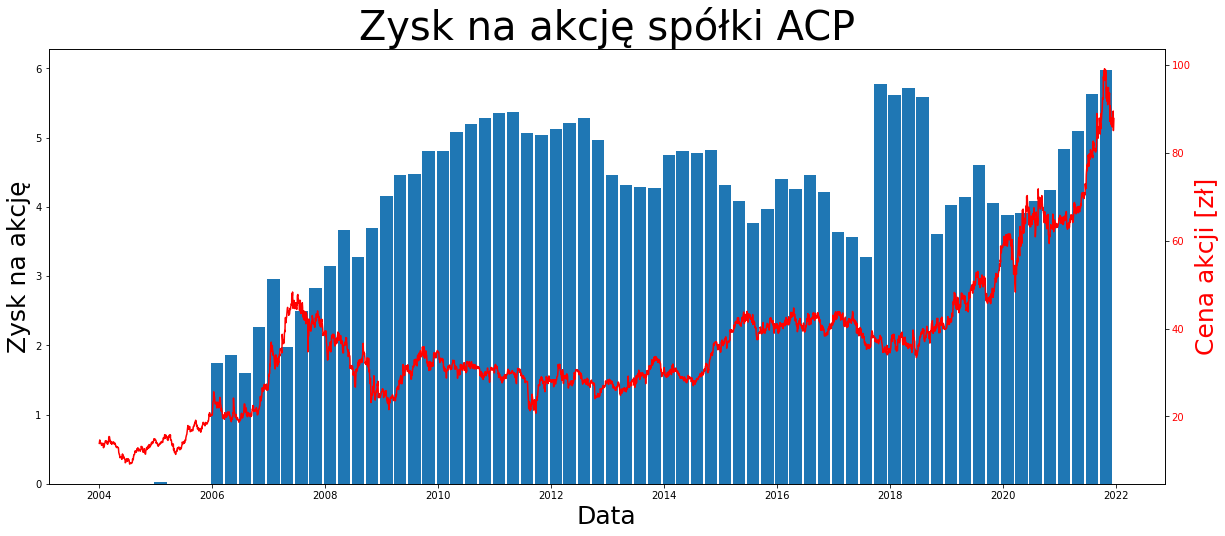

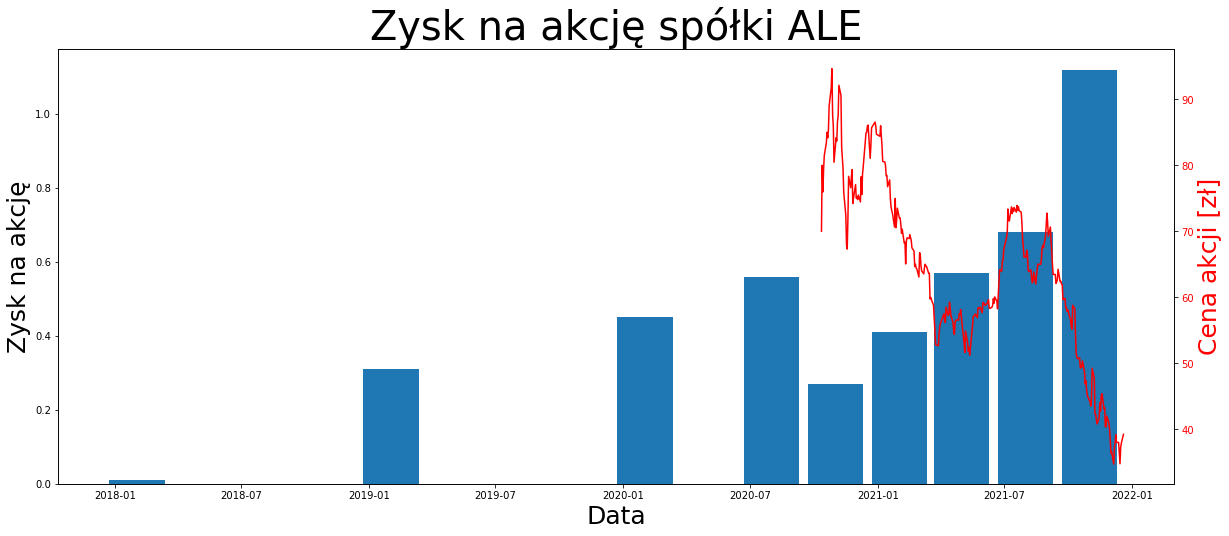

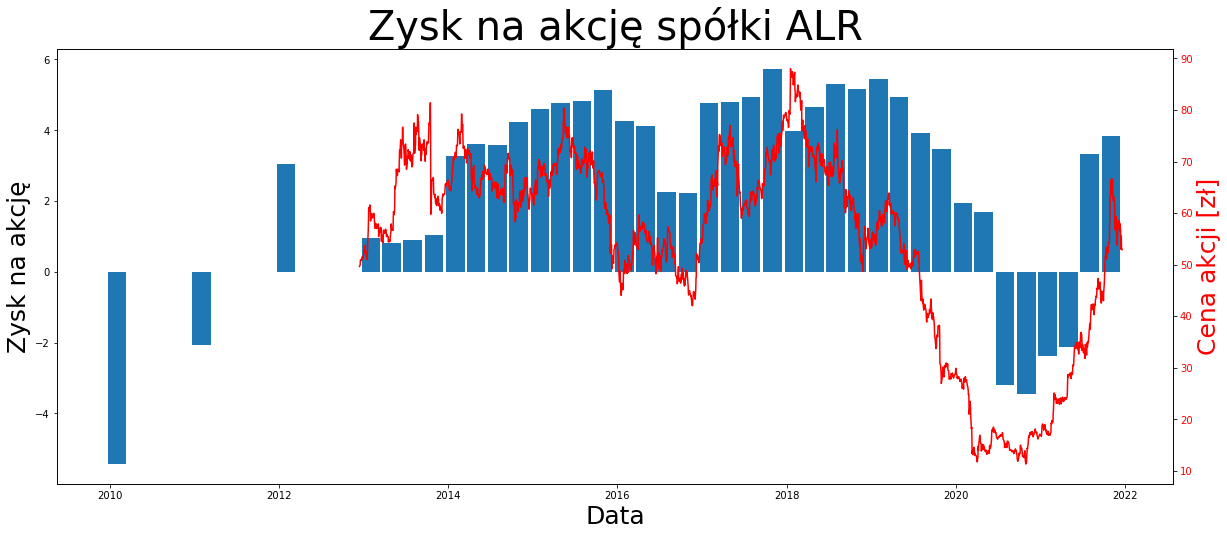

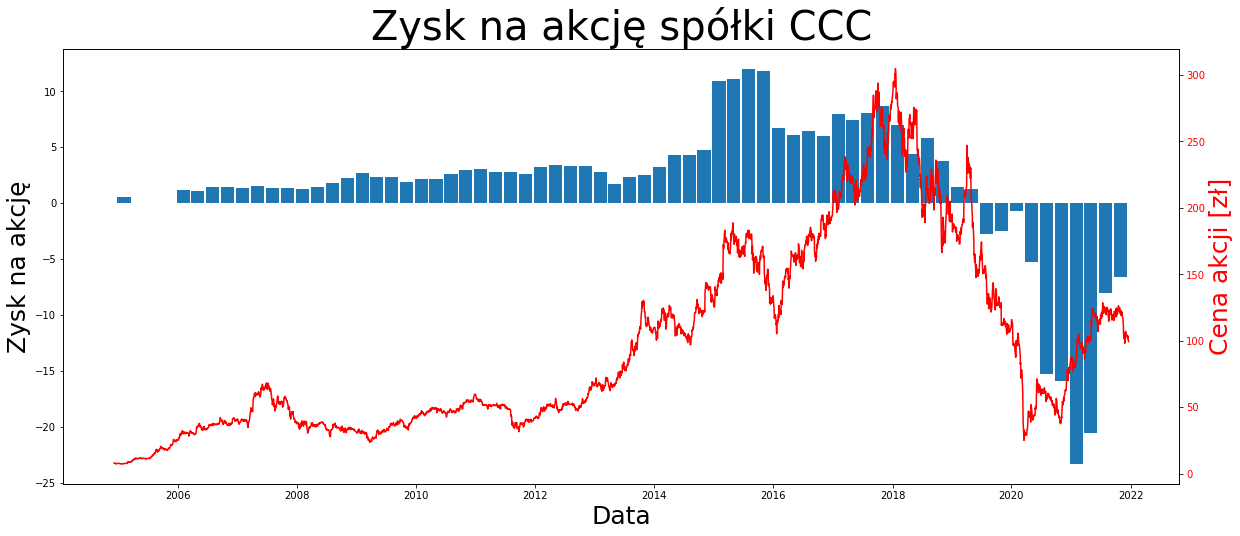

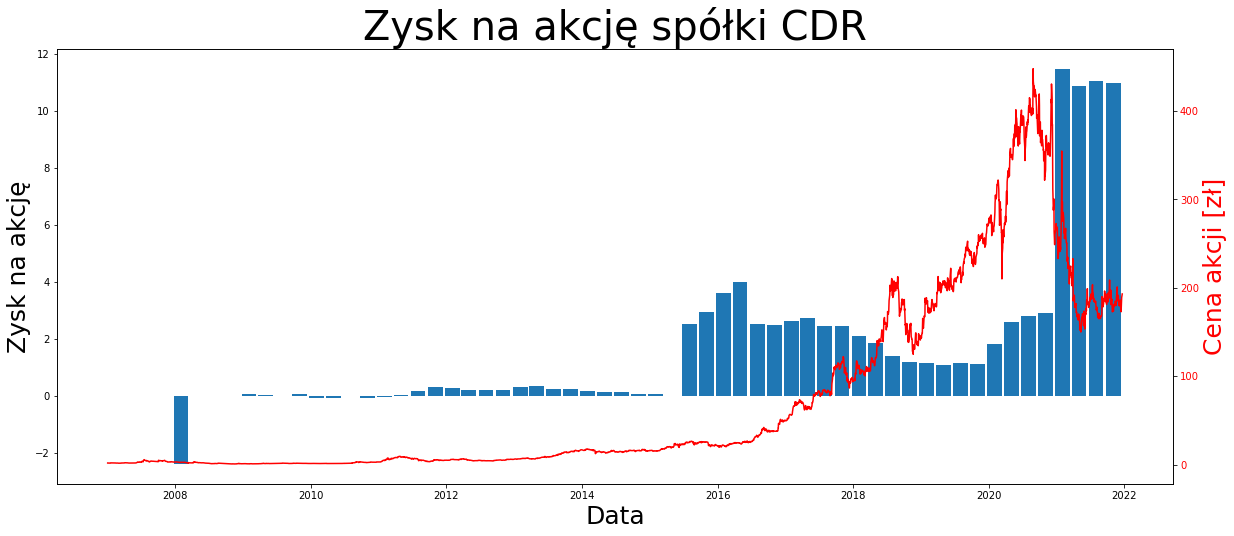

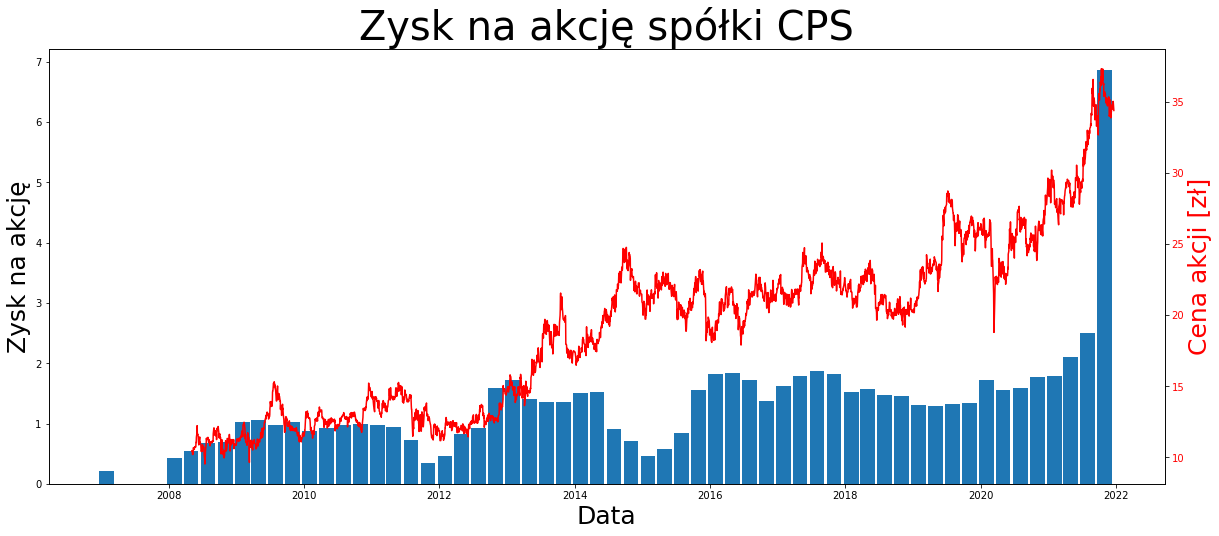

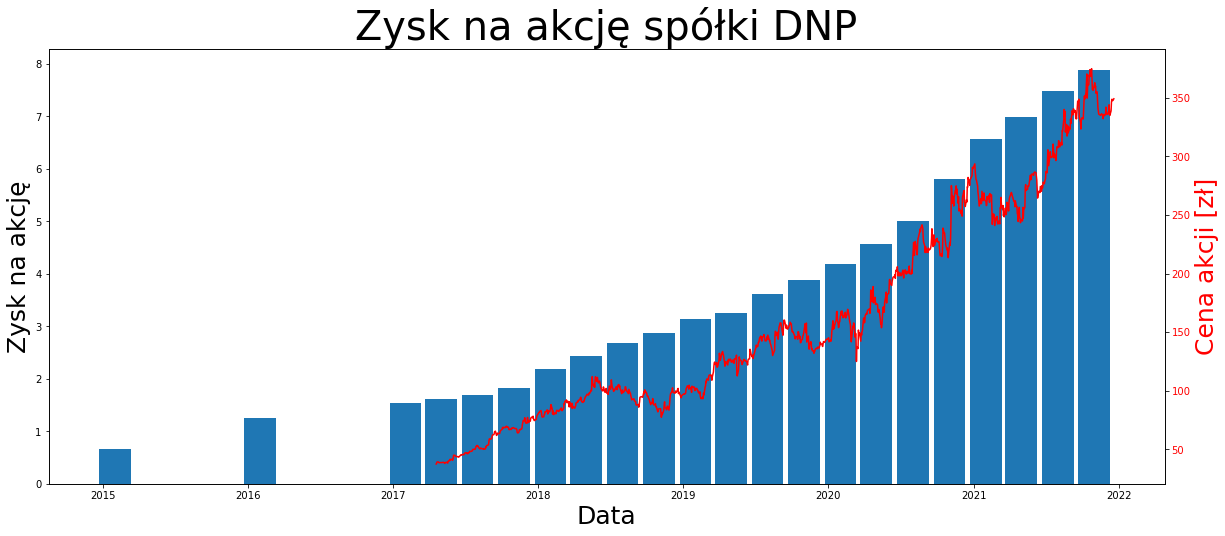

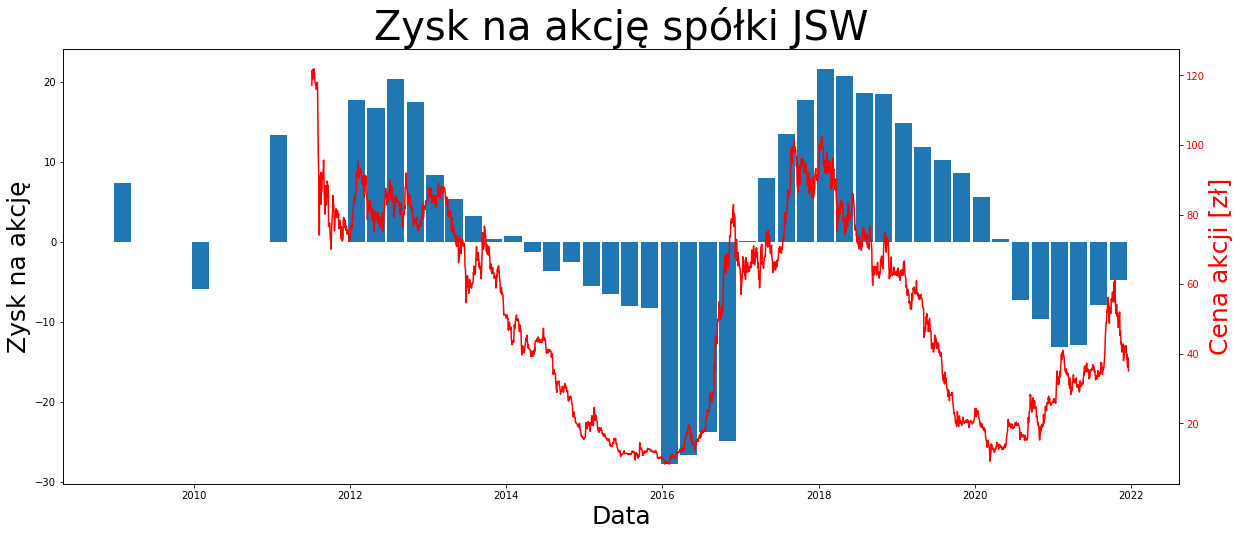

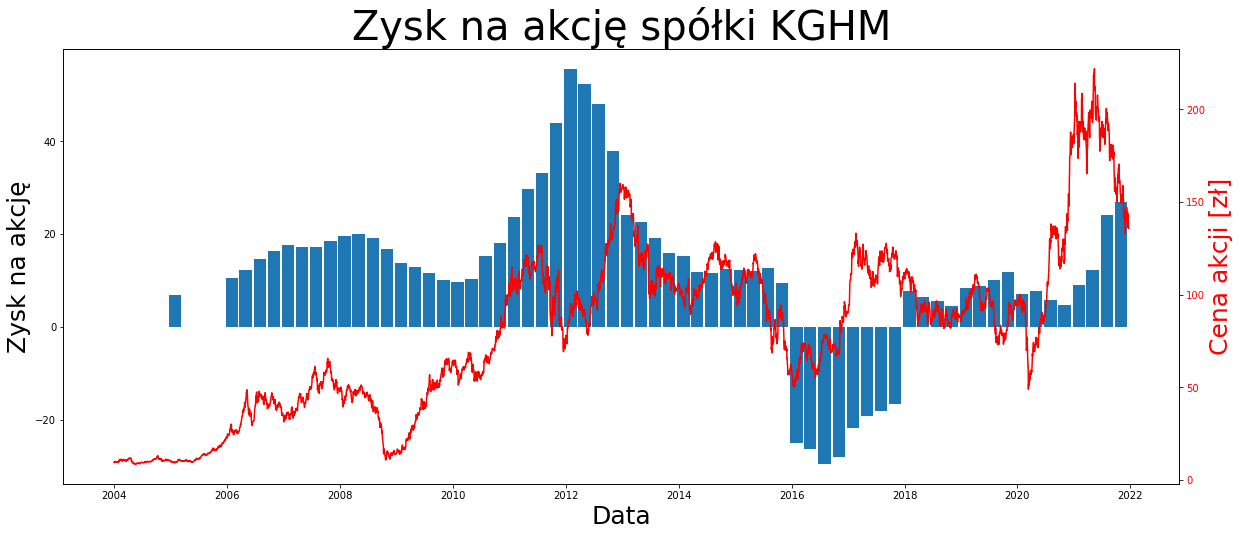

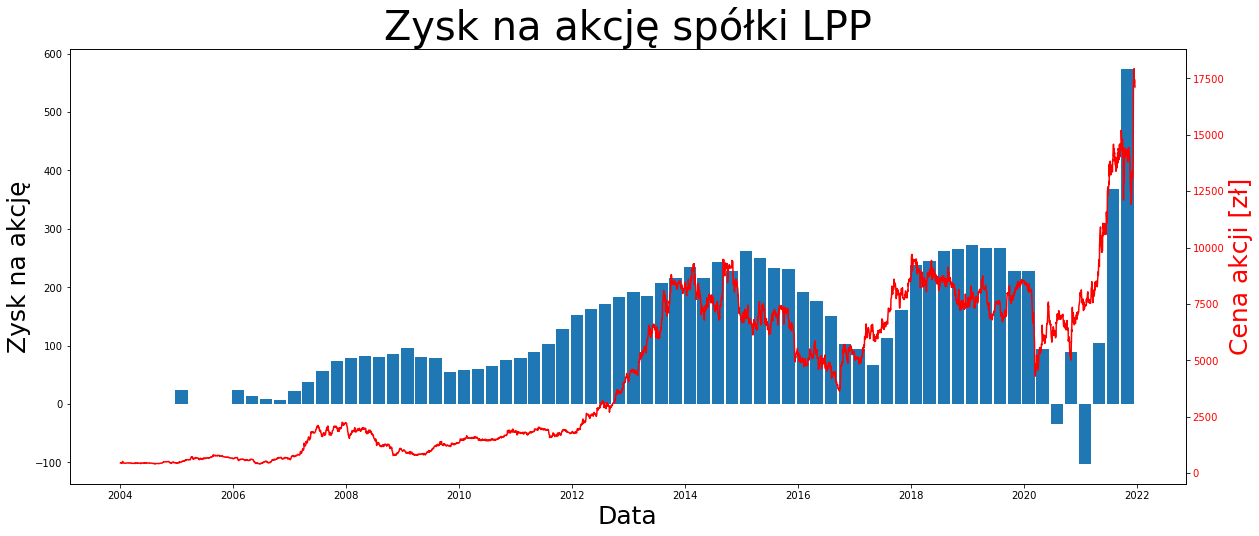

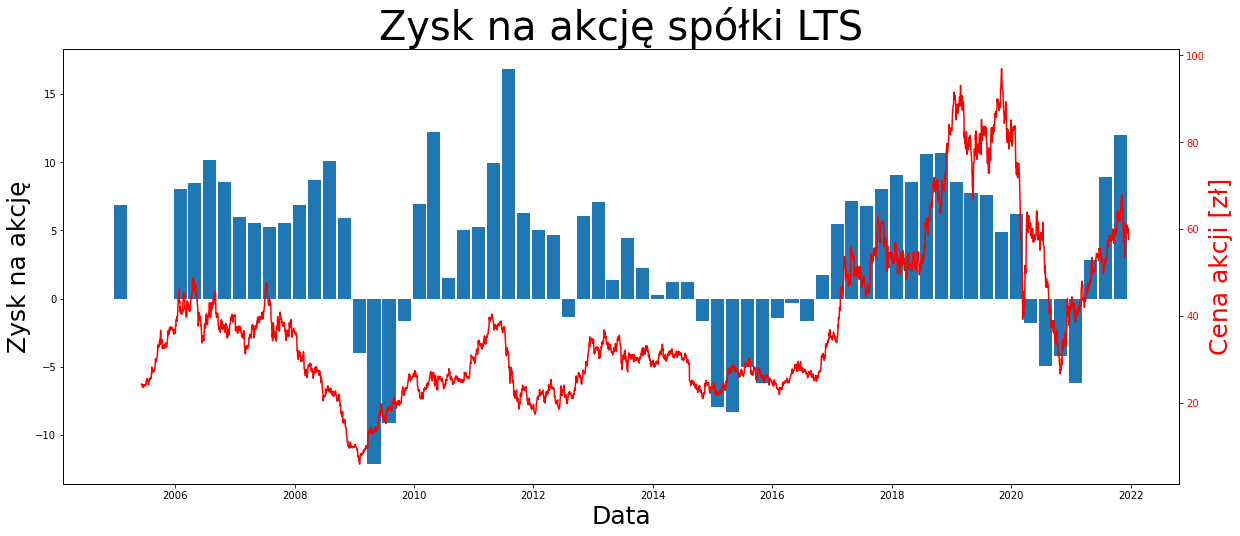

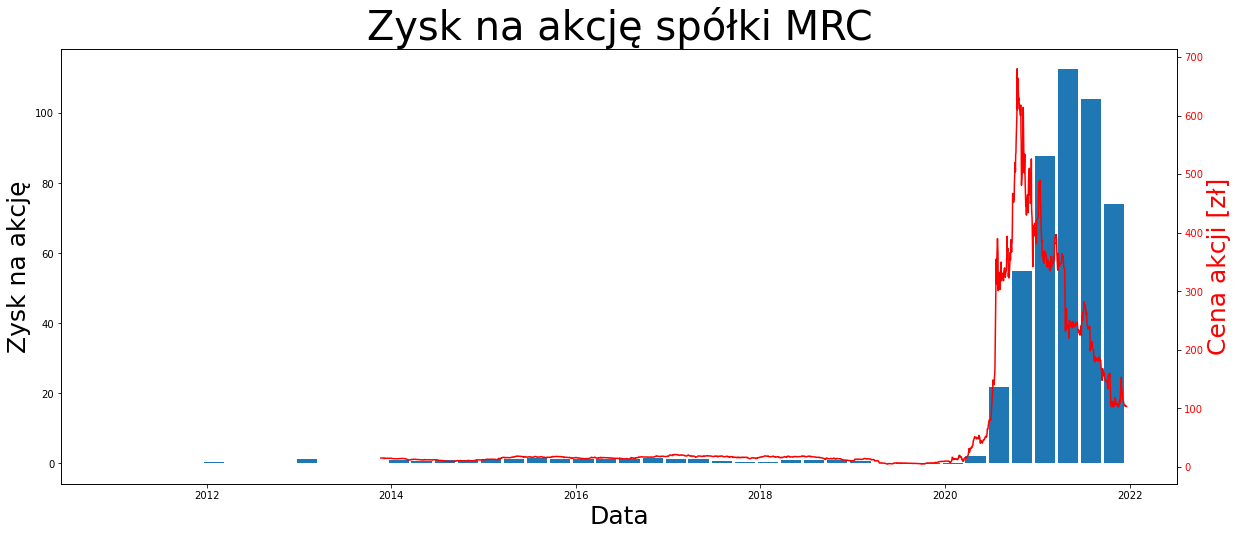

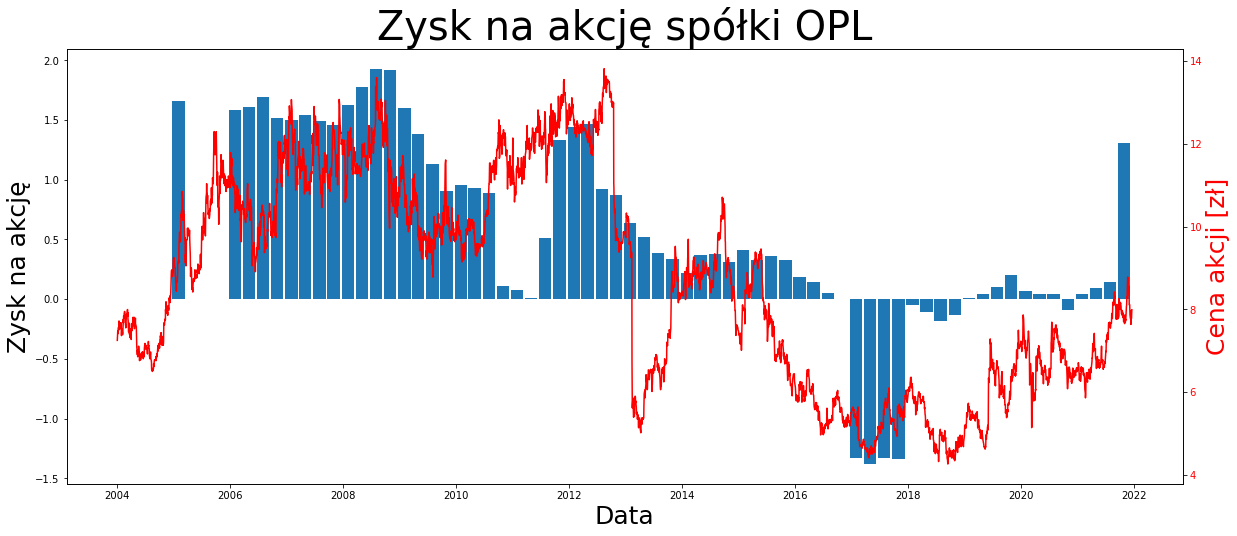

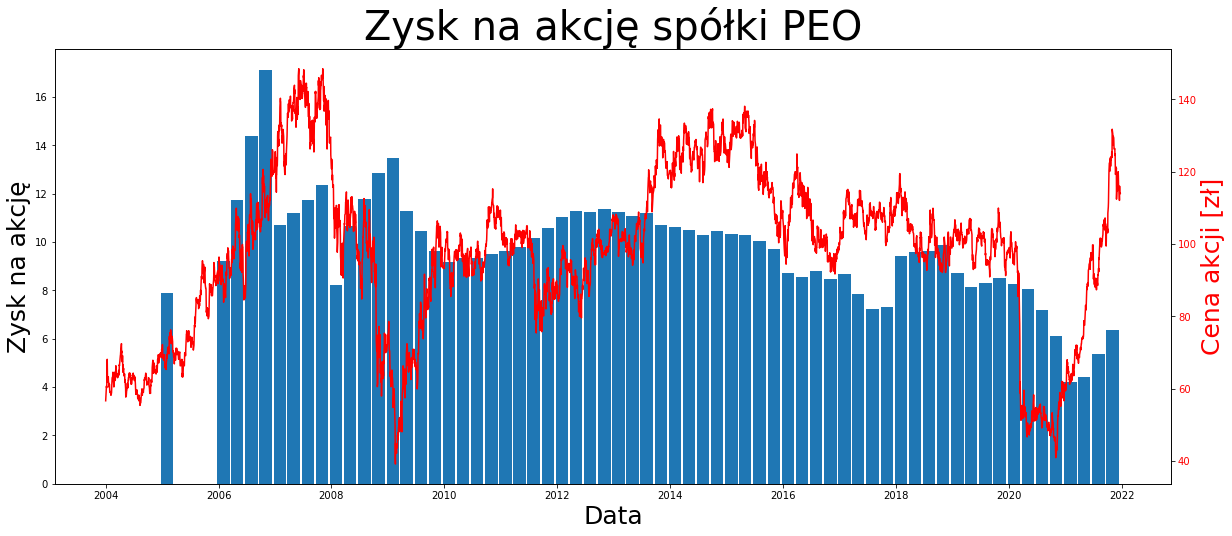

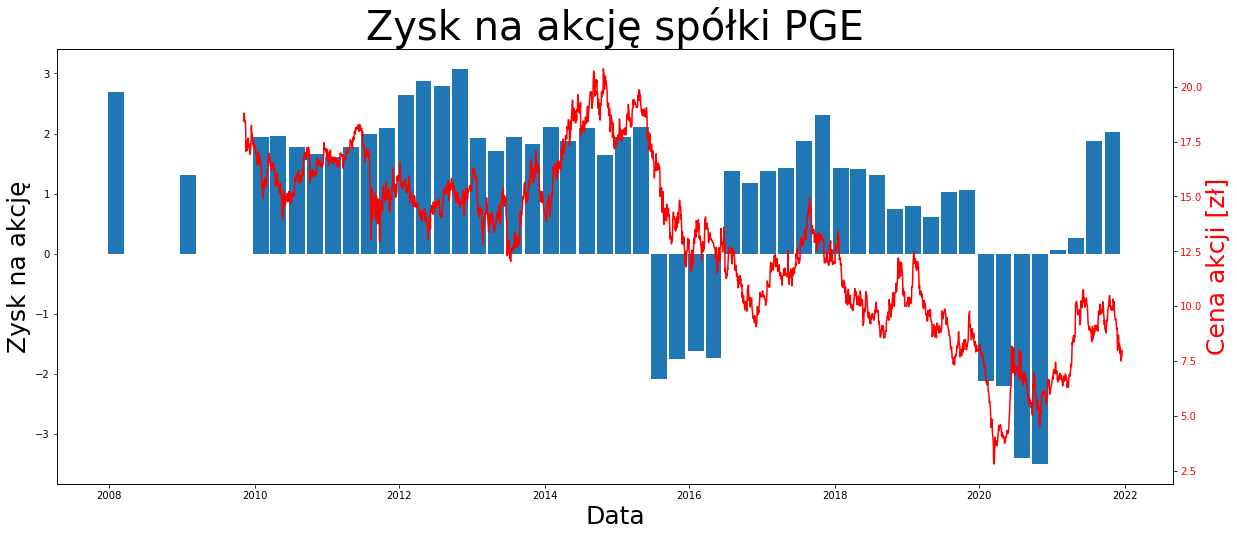

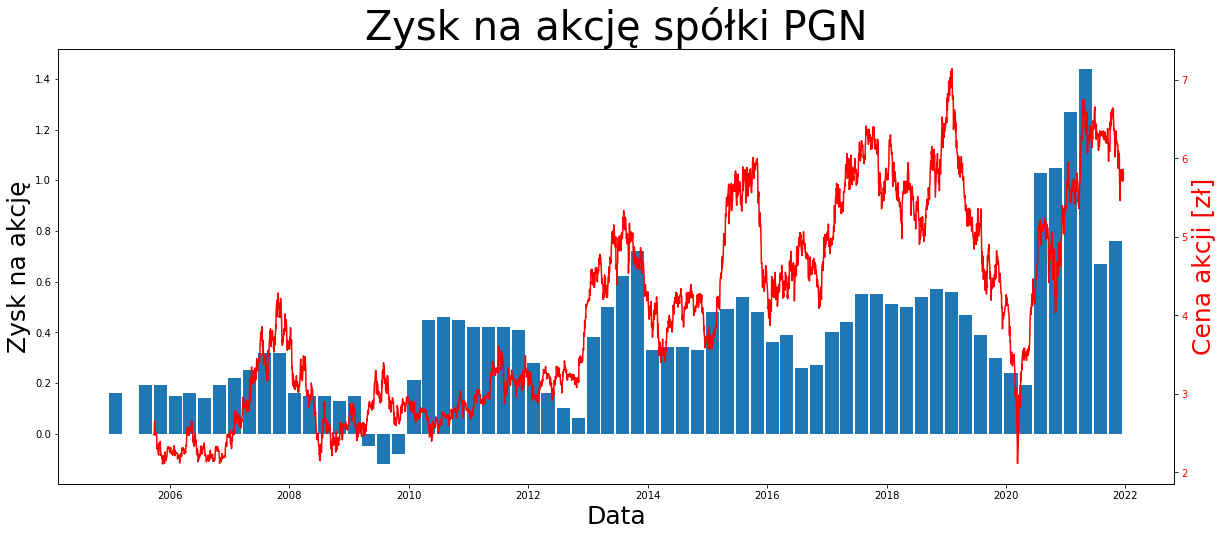

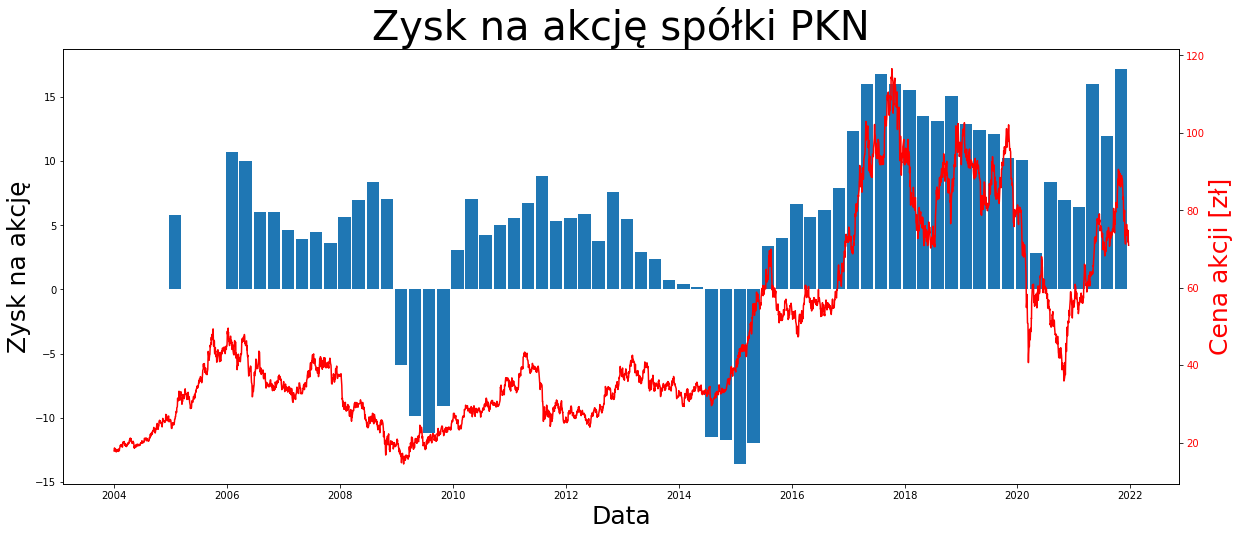

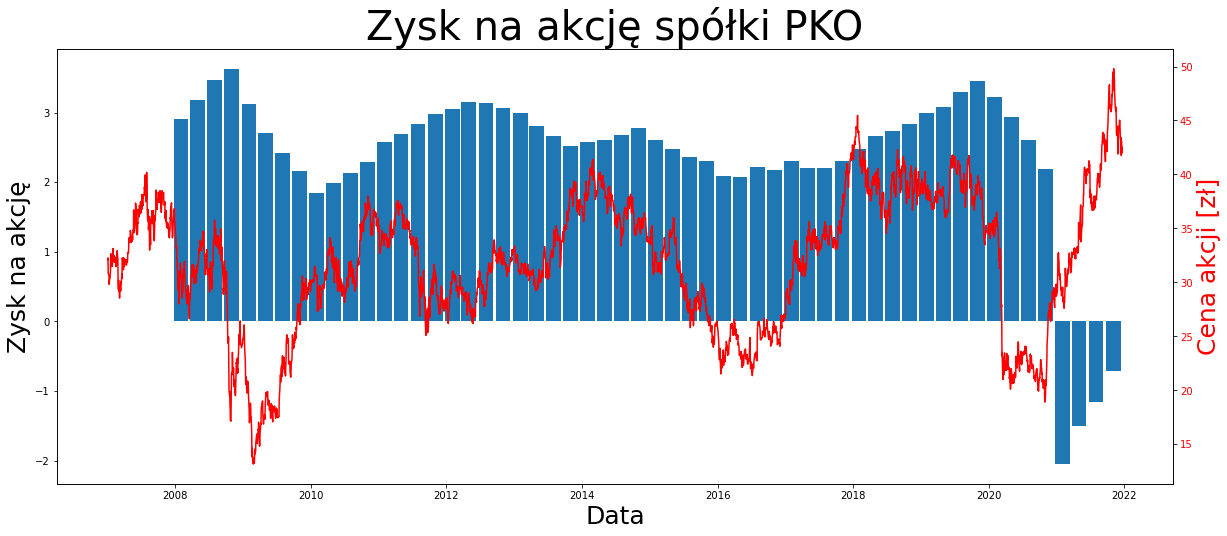

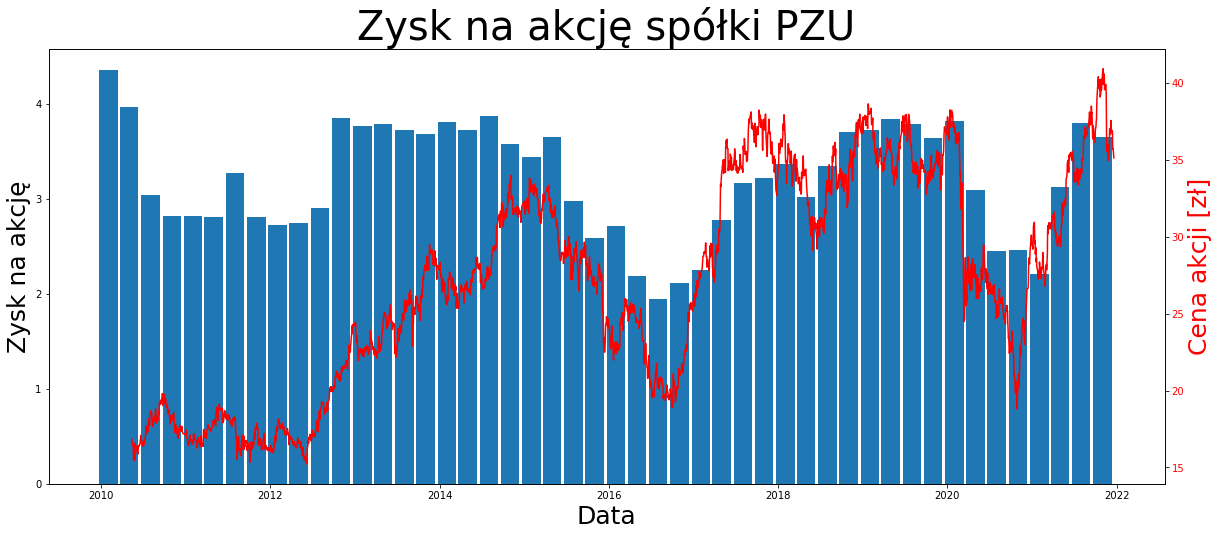

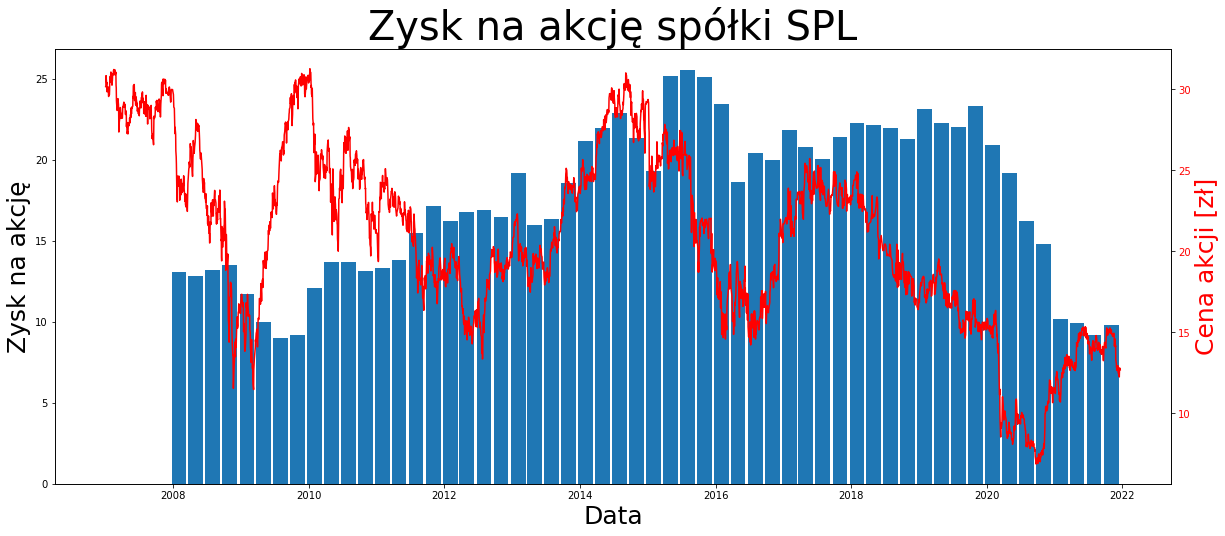

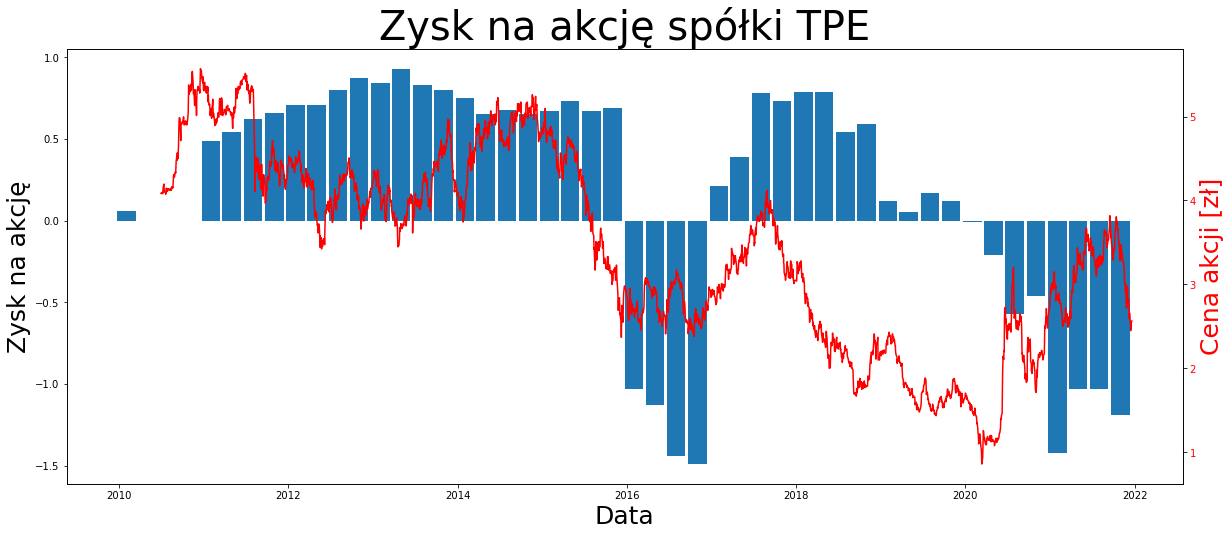

In [11]:
for stock in stock_data.Spółka.drop_duplicates().to_list():
    plot_fundamental_indicators(stock, 'Zysk na akcję')

<ipython-input-10-4d26711d689c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(20,8))


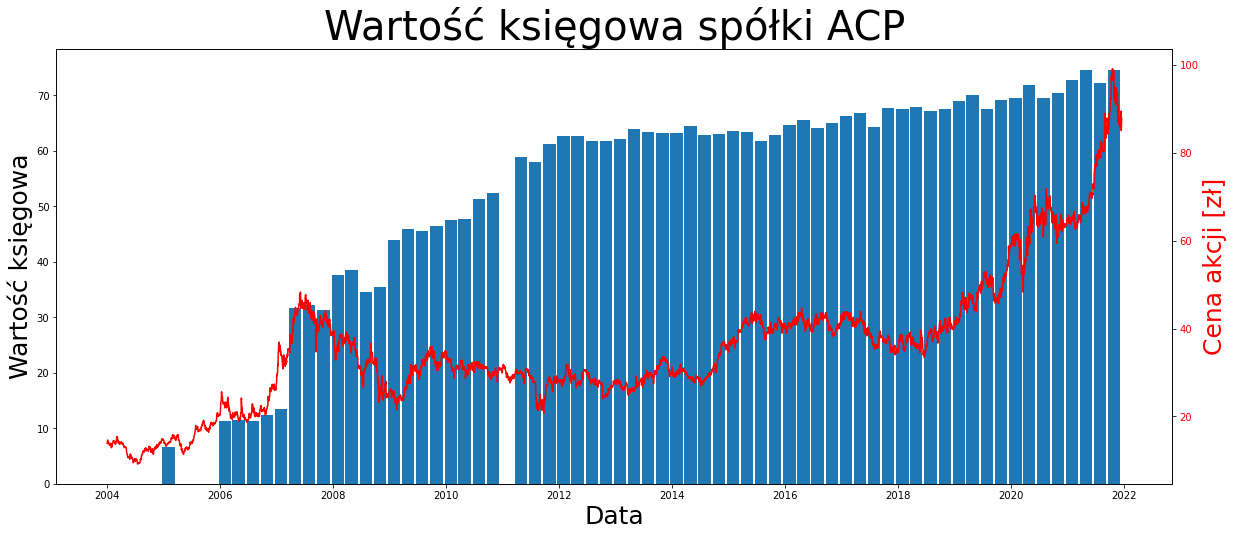

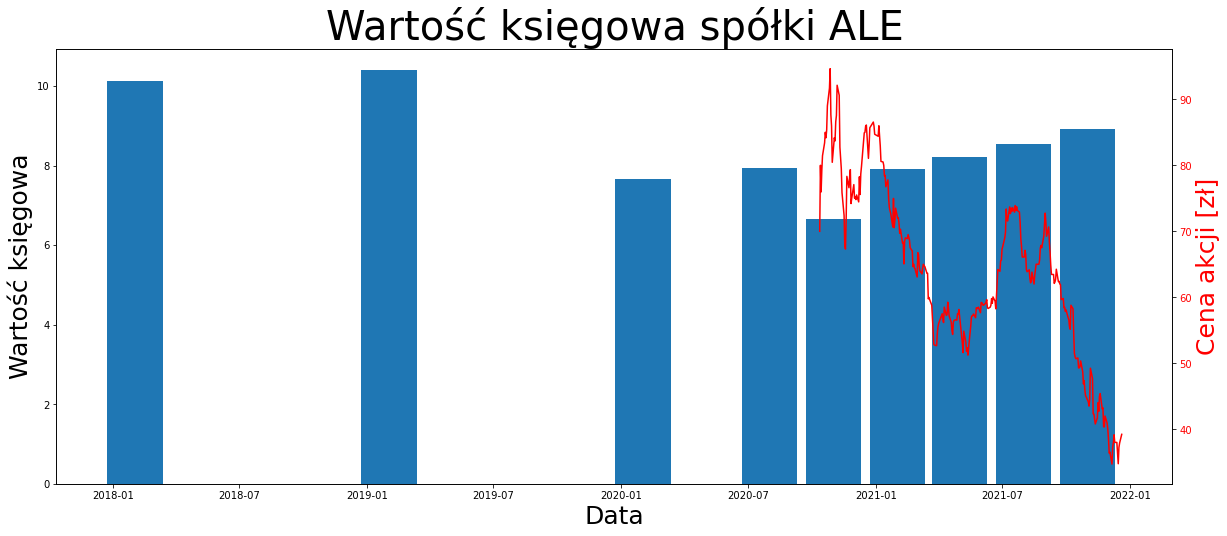

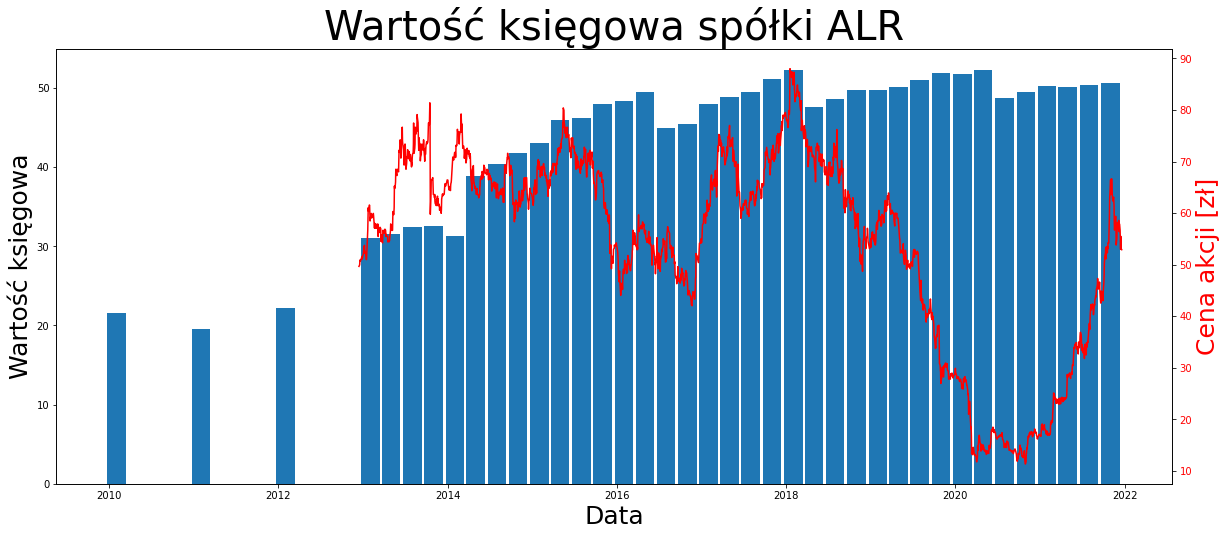

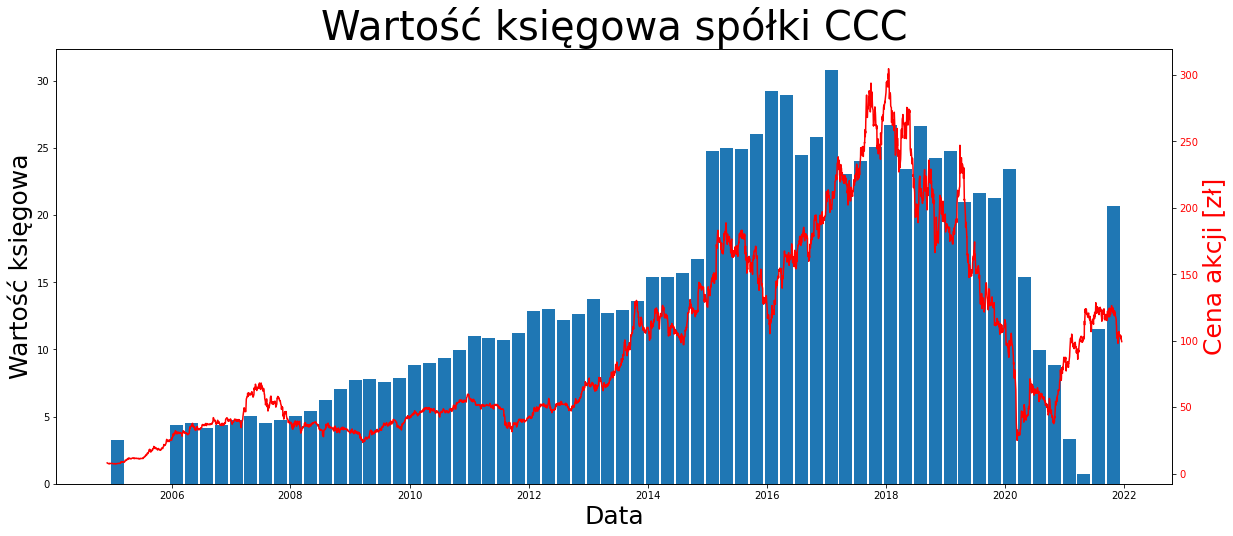

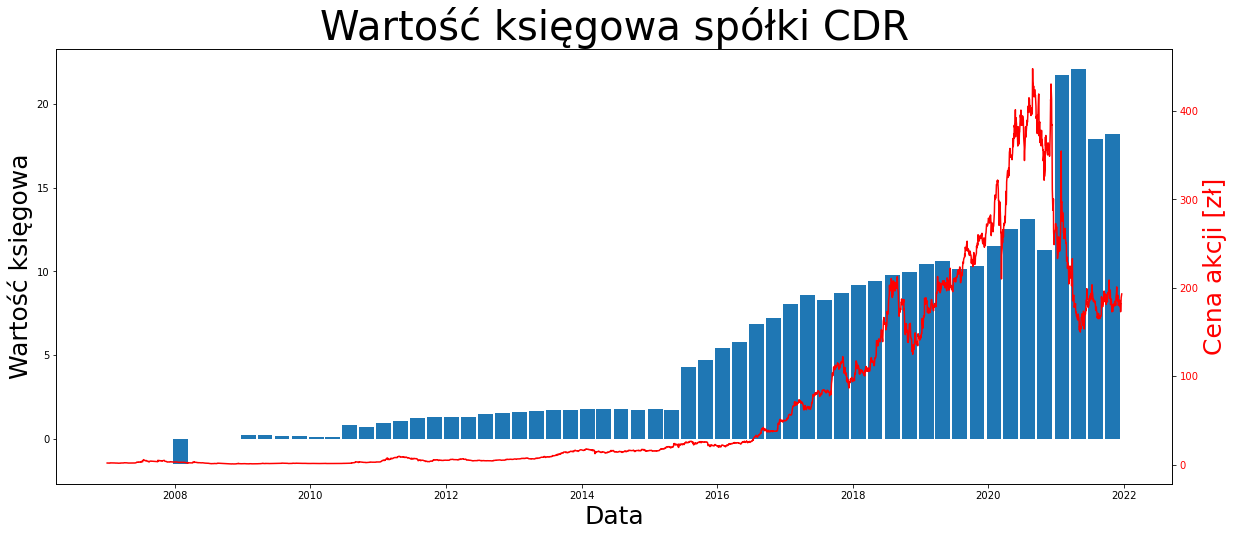

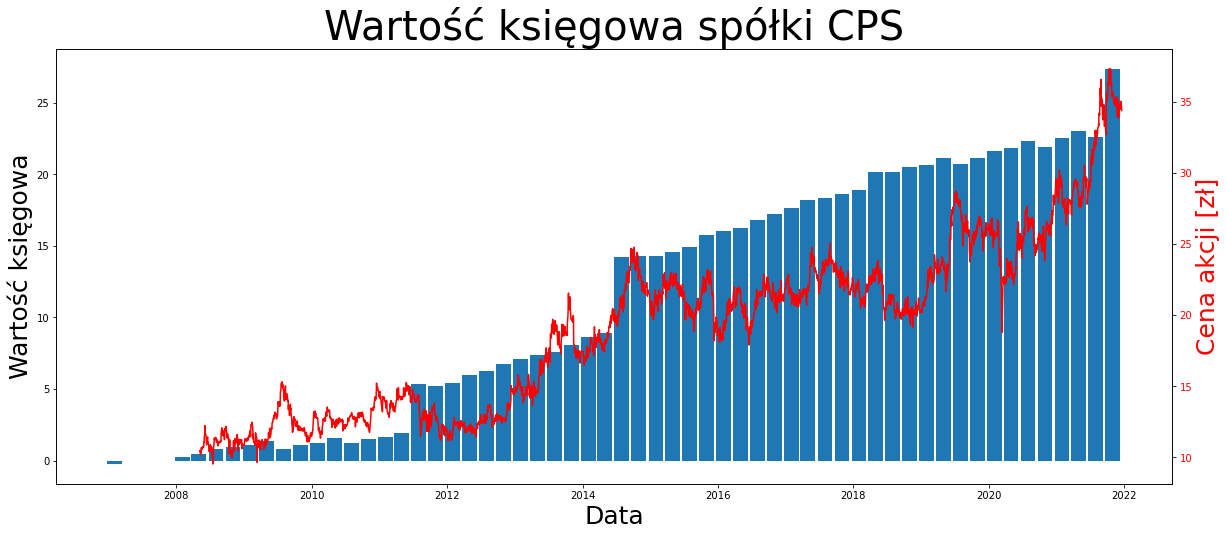

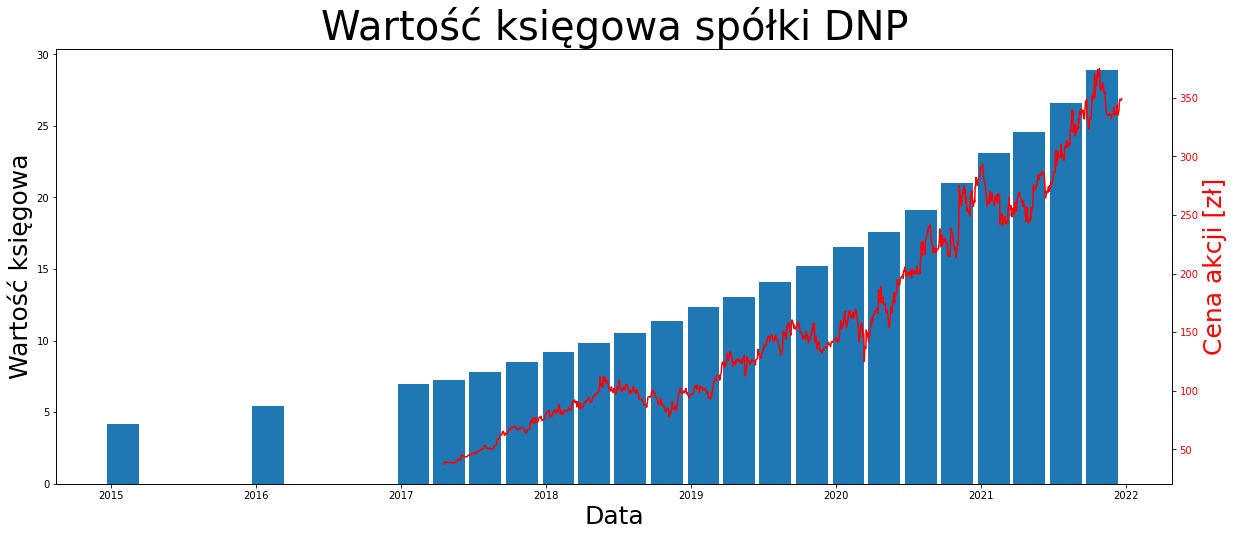

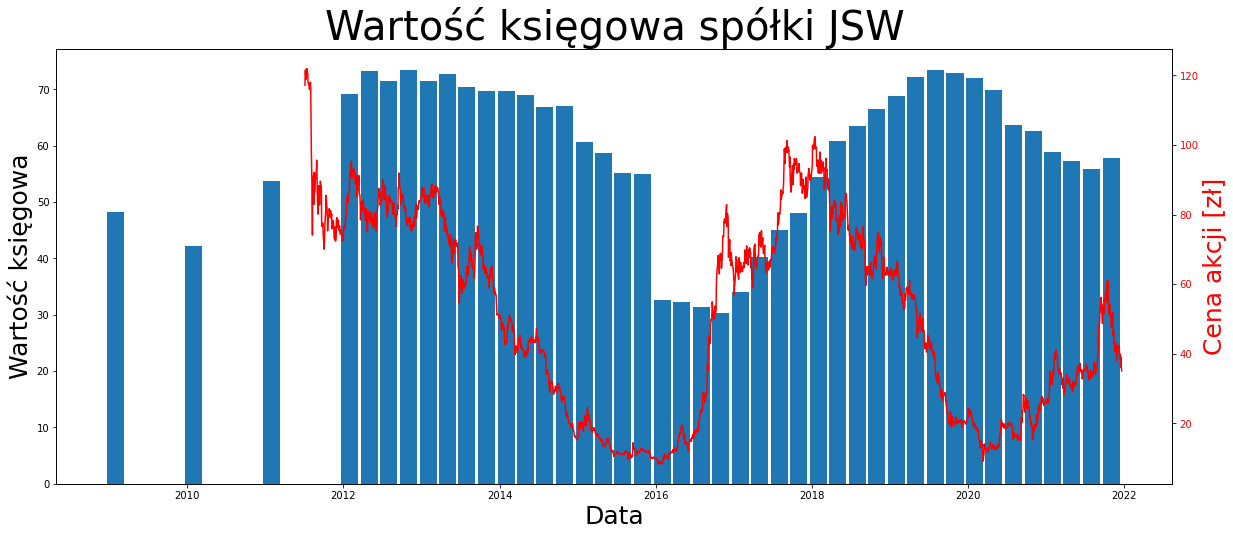

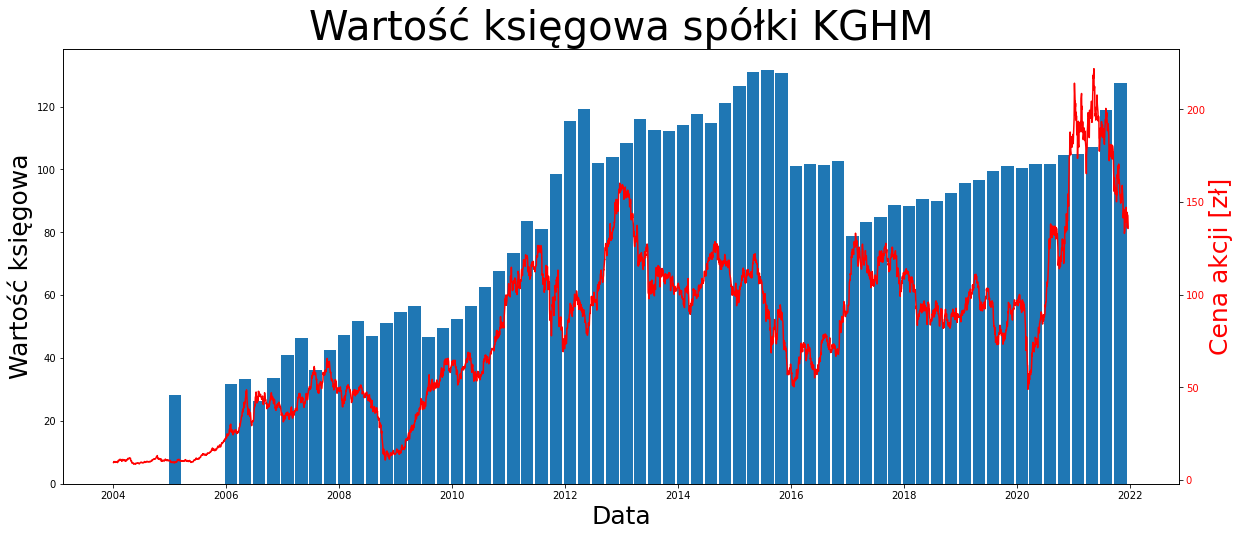

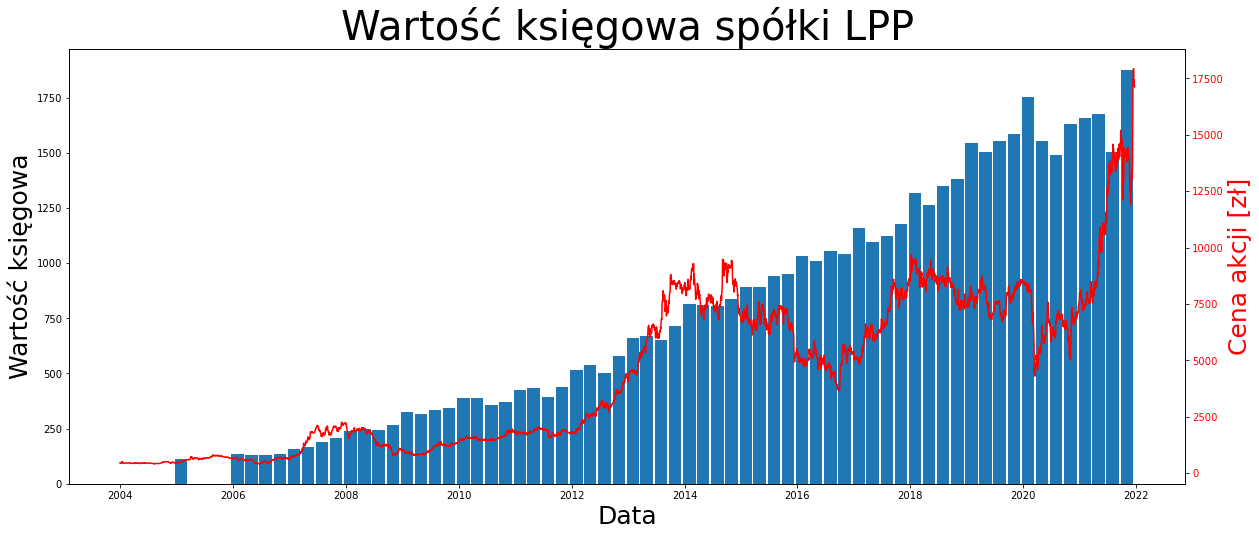

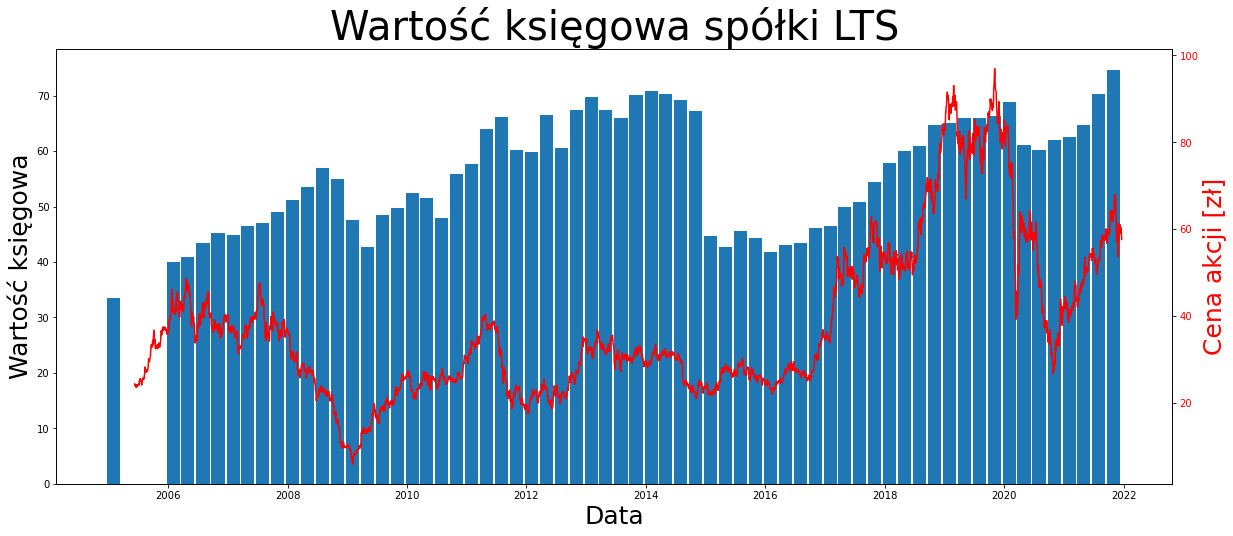

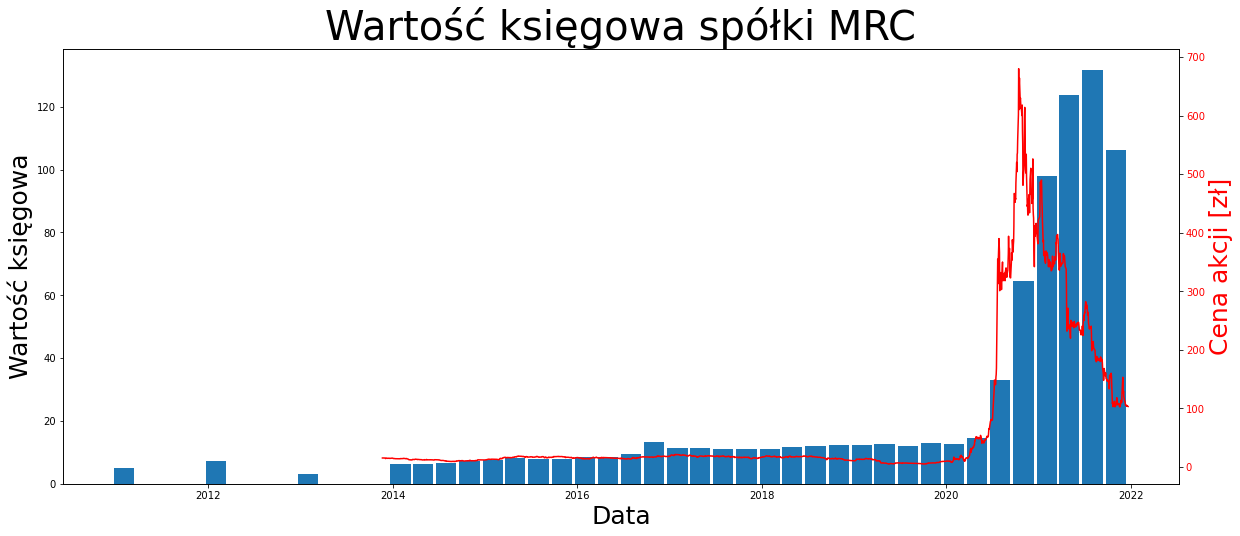

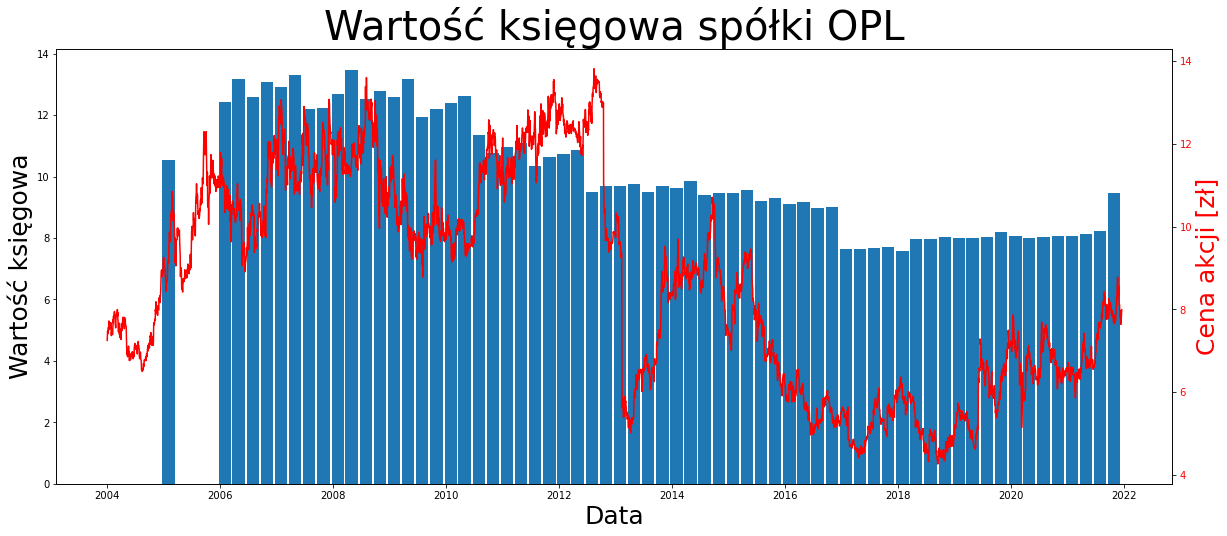

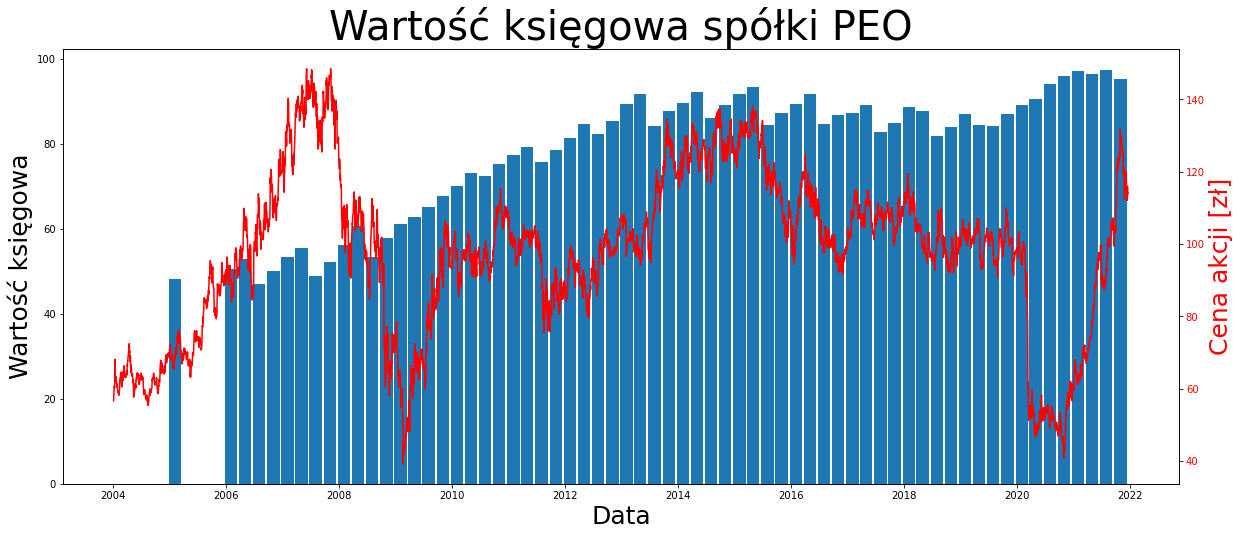

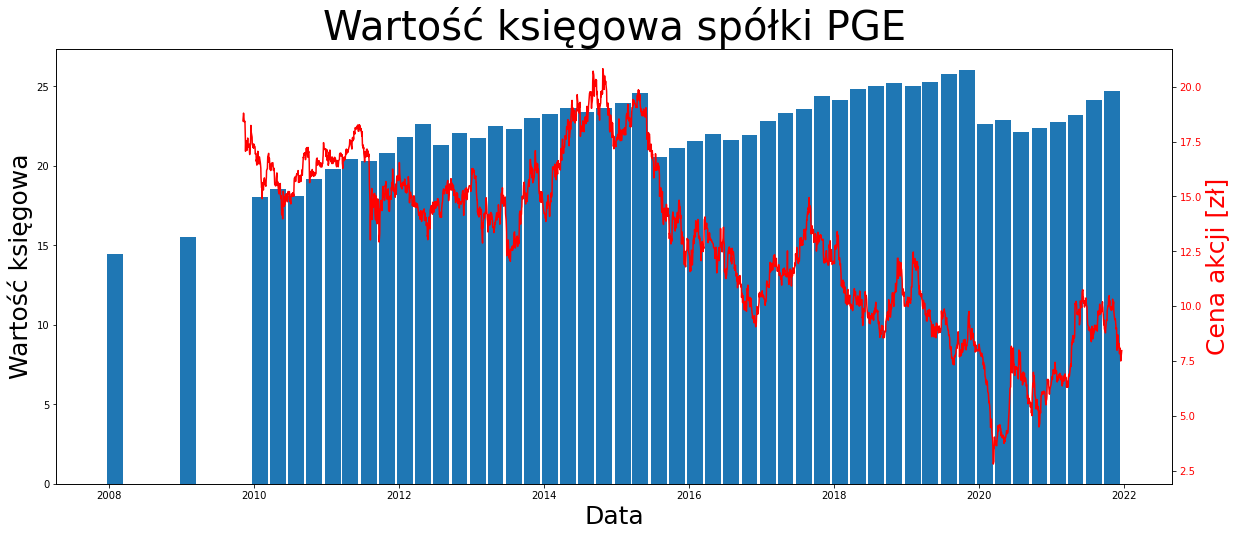

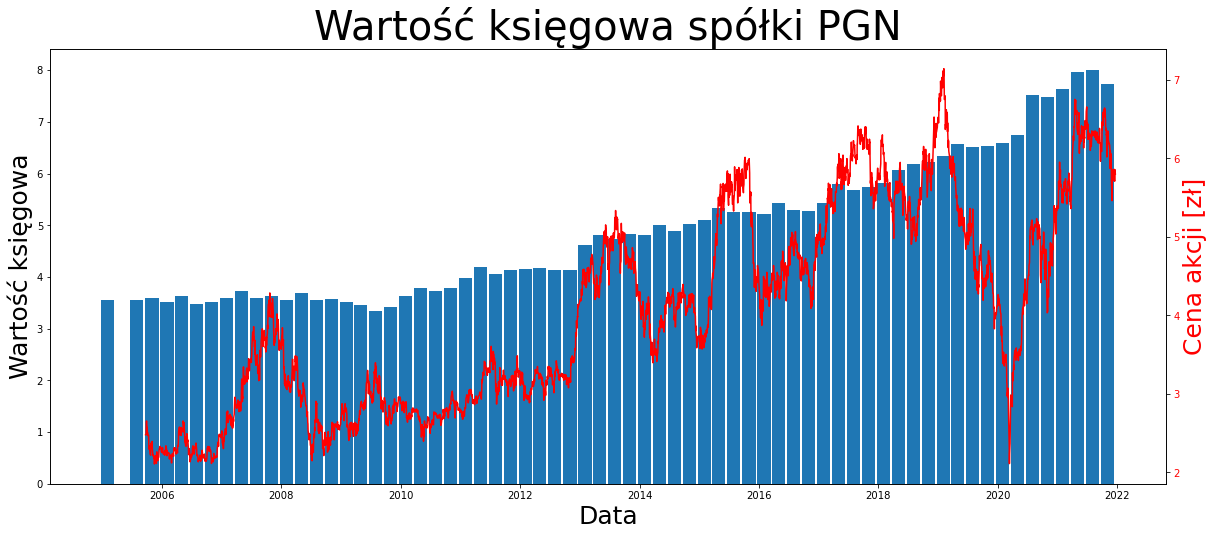

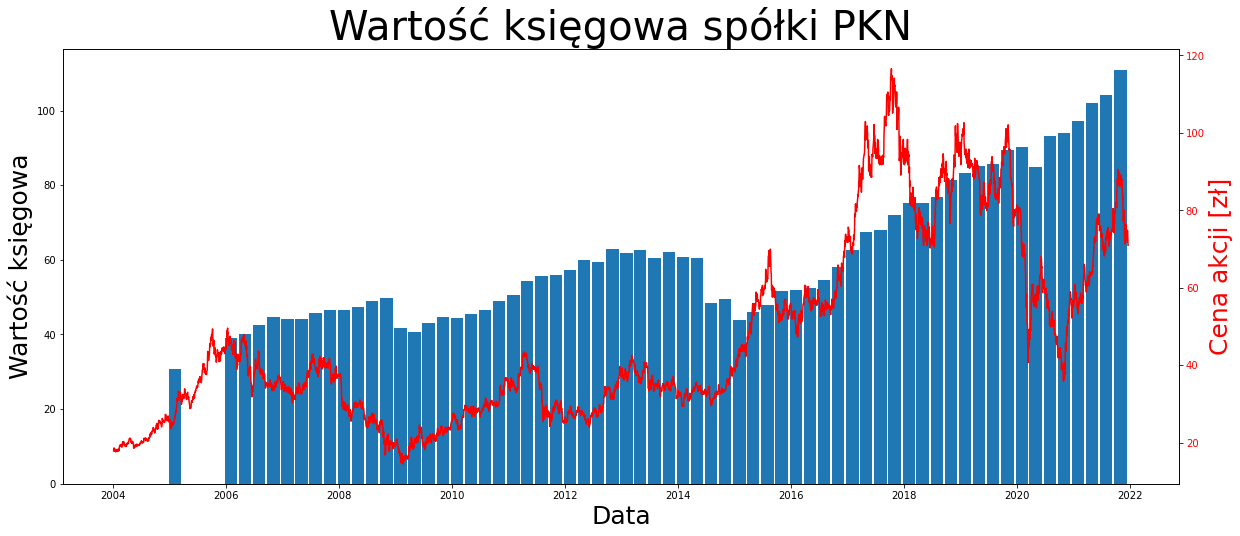

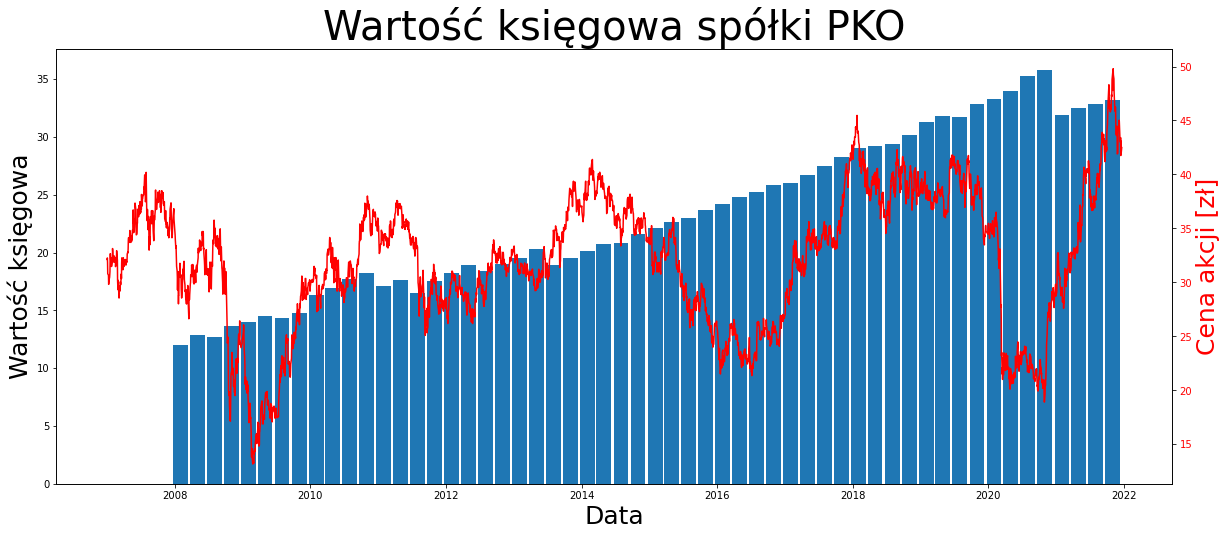

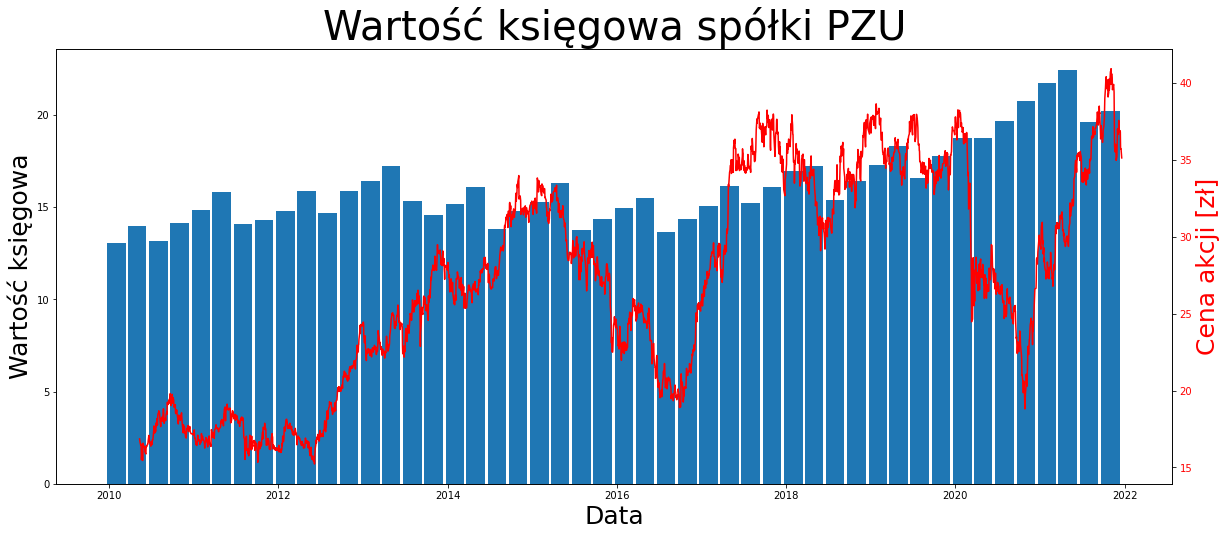

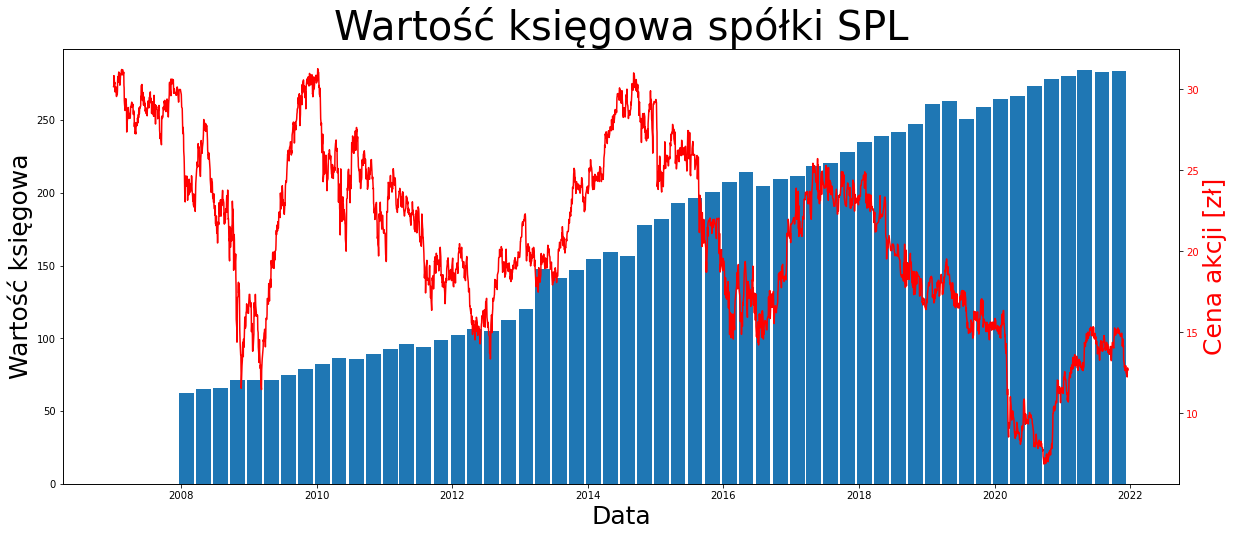

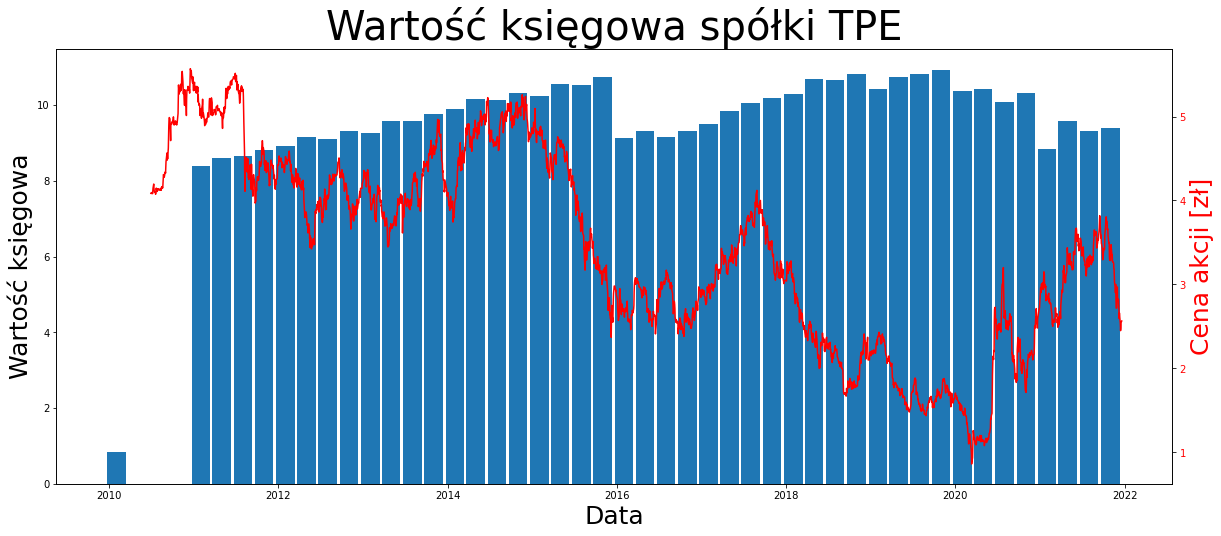

In [12]:
for stock in stock_data.Spółka.drop_duplicates().to_list():
    plot_fundamental_indicators(stock, 'Wartość księgowa')